In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# defining a function that will help us quickly calulate an average of a list
def avgOfList(list):
    return sum(list) / len(list)

# reading in the production spreadsheet
df = pd.read_csv(r'well production.csv')
df.sort_values('well name', axis = 0)
# making list of well names
listOfWellNames = df['well name'].values
listOfFiles = []

# reading in spreadsheets of well data
for i in listOfWellNames:
    j = pd.read_csv((i + '.csv'))
    listOfFiles.append(j)
    
# creating easting and northing data to plot a map of the wells
easting = []
northing = []
for i in listOfFiles:
    easting.append(i.easting.values)
    northing.append(i.northing.values)

In [2]:
# creating 2D arrays of all values for each feature, from each well file so they can be plotted later
porosity = []
permeability = []
poissonRatio = []
youngMod = []
waterSat = []
oilSat = []
thickness = []
proppWt = []
pumpRt = []
for i in listOfFiles:
    porosity.append(i.porosity.values)
    permeability.append(i.permeability.values)
    poissonRatio.append(i["Poisson's ratio"].values)
    youngMod.append(i["Young's Modulus"].values)
    waterSat.append(i['water saturation'].values)
    oilSat.append(i['oil saturation'].values)
    thickness.append(i['thickness (ft)'].values)
    proppWt.append(i['proppant weight (lbs)'].values)
    pumpRt.append(i['pump rate (cubic feet/min)'].values)

# create lists that contain average value for the feature from each well
avgNorth = []
for well in northing:
    avgNorth.append(avgOfList(well))
avgEast = []
for well in easting:
    avgEast.append(avgOfList(well))
avgPor = []
for well in porosity:
    avgPor.append(avgOfList(well))
avgPerm = []
for well in permeability:
    avgPerm.append(avgOfList(well))
avgPR = []
for well in poissonRatio:
    avgPR.append(avgOfList(well))
avgYM = []
for well in youngMod:
    avgYM.append(avgOfList(well))
avgWS = []
for well in waterSat:
    avgWS.append(avgOfList(well))
avgOS = []
for well in oilSat:
    avgOS.append(avgOfList(well))
avgThk = []
for well in thickness:
    avgThk.append(avgOfList(well))
avgPRPWT = []
for well in proppWt:
    well_mean = np.nanmean(well, axis=0)
    inds = np.where(np.isnan(well))
    well[inds] = well_mean
    avgPRPWT.append(avgOfList(well))
avgPMPRT = []
for well in pumpRt:
    well_mean = np.nanmean(well, axis=0)
    inds = np.where(np.isnan(well))
    well[inds] = well_mean
    avgPMPRT.append(avgOfList(well))

#add all these lists to dataframe as additional columns
df['average northing'] = avgNorth
df['average easting'] = avgEast
df['average porosity'] = avgPor
df['average permeability'] = avgPerm
df['average poissons ratio'] = avgPR
df['average youngs modulus'] = avgYM
df['average water saturation'] = avgWS
df['average oil saturation'] = avgOS
df['average thickness'] = avgThk
df['average proppant weight'] = avgPRPWT
df['average pump rate'] = avgPMPRT

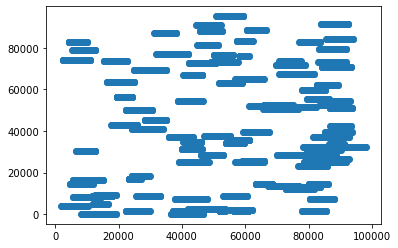

In [3]:
# map of wells
plt.scatter(easting, northing)

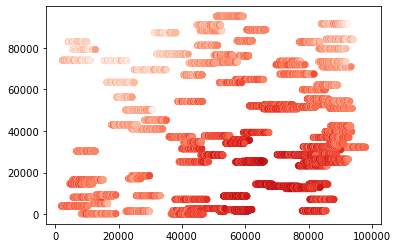

In [4]:
# map of wells colored by porosity
# high porosity at (70, 10)
plt.scatter(easting, northing, c = porosity,cmap="Reds")

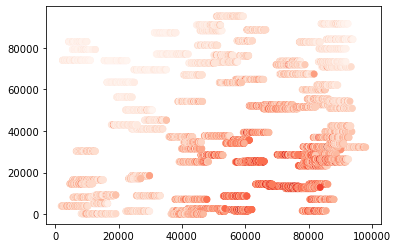

In [5]:
# map of wells colored by permeability
# looks uniform
plt.scatter(easting, northing, c = permeability, cmap = "Reds")

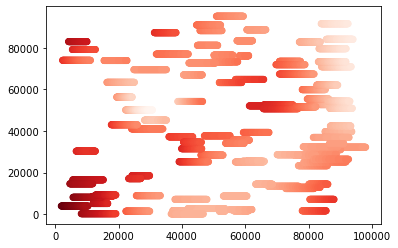

In [6]:
# map of wells colored by PR
plt.scatter(easting, northing, c = poissonRatio, cmap = "Reds")

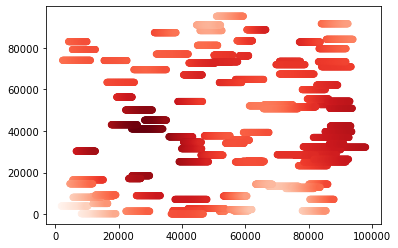

In [7]:
# map of wells colored by YM
plt.scatter(easting, northing, c = youngMod, cmap = "Reds")

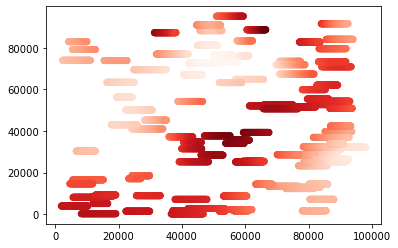

In [8]:
# map of wells colored by water saturation
plt.scatter(easting, northing, c = waterSat, cmap = "Reds")

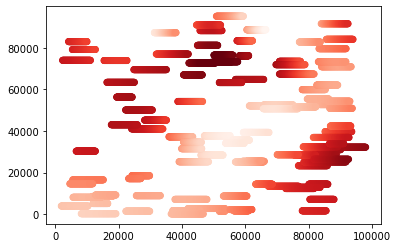

In [9]:
# map of wells colored by oil saturation
# hotspot for oil at (90, 30) and (50,70)
plt.scatter(easting, northing, c = oilSat, cmap = "Reds")

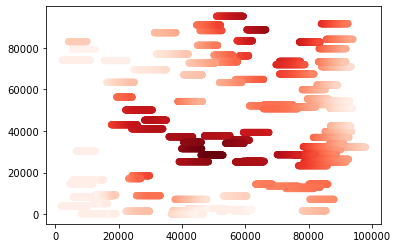

In [10]:
# map of wells colored by thickness
# thicker toward center of reservoir
plt.scatter(easting, northing, c = thickness, cmap = "Reds")

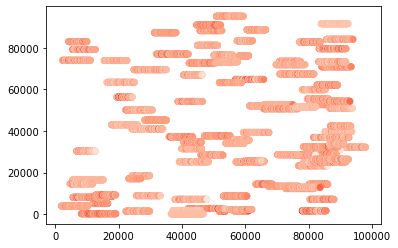

In [11]:
# map of wells colored by proppant rate
# looks uniform
plt.scatter(easting, northing, c = proppWt, cmap = "Reds")

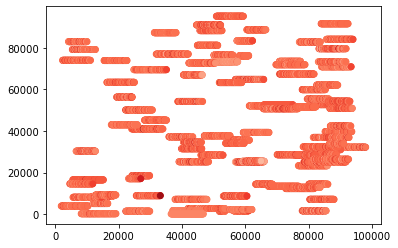

In [12]:
# map of wells colored by pump rate
# looks uniform
plt.scatter(easting, northing, c = pumpRt, cmap = "Reds")

In [13]:
avgRR = avgOfList(df['recovery factor'].values)
avgRR

0.09490102068043484

In [14]:
# find wells that are above 75th percentile for average porosity, oil saturation, and permeability
namesOfBest = []
eastOfBest = []
northOfBest = []

# 75th percentile values (cutoffs)
porosityCutoff = df['average porosity'].quantile(.75)
oilSatCutoff = df['average oil saturation'].quantile(.75)
permCutoff = df['average permeability'].quantile(.75)

for i in range(0, len(df['well name'].values)):
    if (df.iloc[i]['average porosity'] > porosityCutoff) and (df.iloc[i]['average oil saturation'] > oilSatCutoff) and (df.iloc[i]['average permeability'] > permCutoff):
        namesOfBest.append(df.iloc[i][0])
        northOfBest.append(df.iloc[i]['average northing'])
        eastOfBest.append(df.iloc[i]['average easting'])
        # print out these values that fit the criteria
        print("name:", df.iloc[i][0], "northing:", df.iloc[i]['average northing'], "easting:", df.iloc[i]['average easting'])
        print("porosity: ", df.iloc[i]['average porosity'], "Oil Saturation ", df.iloc[i]['average oil saturation'], "permeability: ", df.iloc[i]['average permeability'])

# print out oil production for each well that fit above criteria (relatively optimal, in better spots)
for name in namesOfBest:
    index = list(df['well name'].values).index(name)
    print(df.iloc[index]['oil 1'], df.iloc[index]['oil 2'], df.iloc[index]['oil 3'], df.iloc[index]['oil 4'], df.iloc[index]['oil 5'])

name: Federal 14-113H northing: 31000.0 easting: 84831.86
porosity:  0.07169999999999999 Oil Saturation  0.9289393062759095 permeability:  0.022609999999999984
name: State 3-95H northing: 23300.0 easting: 81373.8
porosity:  0.07929999999999998 Oil Saturation  0.9307890564785322 permeability:  0.02796999999999998
name: State 3-156H northing: 25100.0 easting: 85172.17
porosity:  0.07459999999999999 Oil Saturation  0.9482775221470735 permeability:  0.024169999999999983
name: Brisket 10-65H northing: 14400.0 easting: 83103.15
porosity:  0.08059999999999996 Oil Saturation  0.9341401570264074 permeability:  0.02810999999999997
name: Pole 14-200H northing: 26400.0 easting: 87171.71
porosity:  0.07289999999999996 Oil Saturation  0.9579469314415757 permeability:  0.023179999999999992
name: Tribal 14-4H northing: 12900.0 easting: 79389.72
porosity:  0.0814 Oil Saturation  0.9257950236446446 permeability:  0.029659999999999978
256.0 242.0 267.0 263.0 199.0
320.0 321.0 310.0 281.0 269.0
419.0 407.

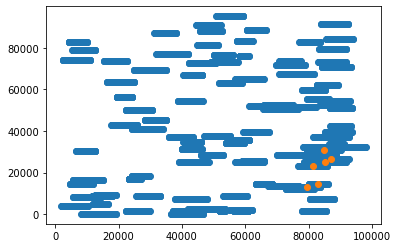

In [15]:
plt.scatter(easting, northing)
plt.scatter(eastOfBest, northOfBest, cmap = "Reds") # the more optimal existing wells as found in previous cell

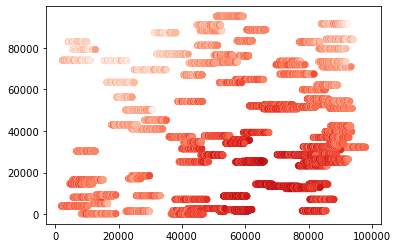

In [16]:
plt.scatter(easting, northing, c = porosity, cmap = "Reds") # just to check the above graph against features again

In [17]:
# find length of each well and append this as column to main dataframe
spreadOfWells = []
for i in range(len(easting)):
    spreadOfWells.append(easting[i].max() - easting[i].min())
df['length of well'] = spreadOfWells

df.columns

Index(['well name', 'average pressure (Pa)', 'recovery factor',
       'formation volume factor', 'oil 1', 'oil 2', 'oil 3', 'oil 4', 'oil 5',
       'oil 6', 'oil 7', 'oil 8', 'oil 9', 'oil 10', 'oil 11', 'oil 12',
       'water 1', 'water 2', 'water 3', 'water 4', 'water 5', 'water 6',
       'water 7', 'water 8', 'water 9', 'water 10', 'water 11', 'water 12',
       'average northing', 'average easting', 'average porosity',
       'average permeability', 'average poissons ratio',
       'average youngs modulus', 'average water saturation',
       'average oil saturation', 'average thickness',
       'average proppant weight', 'average pump rate', 'length of well'],
      dtype='object')

In [18]:
df['average easting']

0     81782.32
1     93221.44
2     13681.29
3     84831.86
4      9038.00
        ...   
95    62570.50
96    19027.67
97    62859.20
98    79389.72
99    65947.32
Name: average easting, Length: 100, dtype: float64

In [19]:
# set containing all the different latitudes where wells exist
northingVals = set()
for n in northing:
    northingVals.add(n[0])

In [20]:
# map: northing vals mapped to list of easting vals from each well
occupiedSpaces = dict()
occupiedSpaces = occupiedSpaces.fromkeys(northingVals)

for key in occupiedSpaces:
    occupiedSpaces[key] = []
    
for i in range (0,len(easting)):
    occupiedSpaces[northing[i][0]].append(easting[i])

In [21]:
#return true if a location already has a well there
def spaceOccupied(e, n):
    if not n in occupiedSpaces:
        return False
    #there is a well somewhere on this latitude so we will check that
    wellsAtNorthing = occupiedSpaces[n]
    for i in range (0, len(wellsAtNorthing)):
        # check for each well if e falls between the max easting and min easting of this
        if wellsAtNorthing[i].min() <= e and wellsAtNorthing[i].max() >= e:
            return True
    return False

In [22]:
# Marco and I assume H is thickness
# E prime = E / (1 - v**2)
# w = (2H / E prime) * p
# w * L = A
# then grab OOIP and RR for wells :) 
def ePrime(E, v):
    return E / (1 - (v ** 2))
E = []
for name in df['well name'].values:
    index = list(df['well name'].values).index(name)
    E.append(ePrime(df.iloc[index]["average youngs modulus"], df.iloc[index]["average poissons ratio"]))
df['average plane strain'] = E

In [23]:
# calculate width and area of each well
def width(H, E, P):
    return ((2 * H * P) / E)
W = []
for name in df['well name'].values:
    index = list(df['well name'].values).index(name)
    W.append(width(df.iloc[index]["average thickness"], df.iloc[index]["average plane strain"], df.iloc[index]['average pressure (Pa)']))
df['average width'] = W
A = []
for name in df['well name'].values:
    index = list(df['well name'].values).index(name)
    A.append(df.iloc[index]['average width'] *df.iloc[index]['length of well'])
df['area'] = A

In [24]:
# calculate original oil in place
FORMATION_FACTOR = 1.6
FEET_ACRES = 43560

# A = area (acres), H = reservoir thickness (ft), P = porosity (%), O = oil saturation (%)
def OOIP(A, H, P, O):
    return 7758 * A * H * P * O / (FORMATION_FACTOR * FEET_ACRES) 

# calculate OOIP for each well and then append these values as column to dataframe
ooip = []
for name in df['well name'].values:
    index = list(df['well name'].values).index(name)
    ooip.append(OOIP(df.iloc[index]["area"], df.iloc[index]["average thickness"], df.iloc[index]['average porosity'], df.iloc[index]['average oil saturation']))
df['OOIP'] = ooip

In [25]:
# calculate recoverable reserves for each well and then append these values as column to main dataframe
rr = []
for name in df['well name'].values:
    index = list(df['well name'].values).index(name)
    rr.append(df.iloc[index]["OOIP"] * df.iloc[index]["recovery factor"])
df['recoverable reserves'] = rr

In [26]:
df['recoverable reserves']

0      42742.146117
1      39169.645992
2        939.373412
3     170298.603559
4         41.652356
          ...      
95    401175.750050
96       195.020559
97    252654.749087
98    196913.902533
99    142750.830761
Name: recoverable reserves, Length: 100, dtype: float64

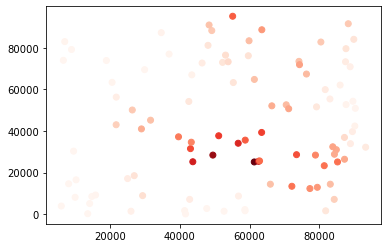

In [27]:
# plot the OOIP for each well, using the midpoint of each well as the location
plt.scatter(df['average easting'], df['average northing'], c = df['OOIP'], cmap = "Reds")

In [28]:
df['recoverable reserves'].values

array([4.27421461e+04, 3.91696460e+04, 9.39373412e+02, 1.70298604e+05,
       4.16523564e+01, 1.64722732e+04, 2.56190208e+05, 5.27290049e+04,
       2.17961689e+05, 1.32406723e+05, 1.04890031e+03, 2.83341290e+04,
       7.24038412e+03, 3.74843469e+04, 1.19556378e+05, 3.24206494e+04,
       2.63900133e+05, 2.19145877e+05, 7.89550529e+02, 4.73204534e+05,
       3.97342040e+02, 2.95855221e+05, 2.53150706e+02, 3.29562325e+04,
       2.80765933e+05, 1.23946484e+05, 3.18571718e+02, 1.65064007e+05,
       1.02709565e+05, 1.31698566e+03, 3.02277718e+05, 5.11305205e+04,
       1.31129177e+05, 1.02973097e+03, 2.10298614e+05, 5.00139789e+04,
       1.60189556e+05, 1.11359483e+05, 6.20439263e+03, 2.67207920e+04,
       1.13747534e+04, 5.76738422e+04, 1.00972837e+05, 6.16794604e+04,
       5.17888287e+05, 8.90670435e+04, 1.37824772e+05, 3.43206571e+04,
       2.49496899e+03, 2.78157849e+03, 2.49194012e+03, 7.43790230e+03,
       1.37017771e+04, 3.75930882e+04, 7.07539882e+03, 5.25516806e+03,
      

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()


X = np.array([np.array([easting]).flatten(),np.array([northing]).flatten()]) # indep var = coordinates
X = X.transpose()
y = np.array([porosity]).flatten()
y = y.reshape(-1,1)

tree.fit(X,y)
print(X)
print(y)

[[78000.  1600.]
 [78076.  1600.]
 [78153.  1600.]
 ...
 [68488. 14400.]
 [68541. 14400.]
 [68595. 14400.]]
[[0.07]
 [0.08]
 [0.09]
 ...
 [0.08]
 [0.08]
 [0.09]]


In [30]:
# split up XY plane into spaces with existing wells and open spaces
northPredict = []
eastPredict = []

northOccupied = []
eastOccupied = []

i = 0
j = 0
for i in range (0, 1000):
    eastTest = i*100
    for j in range(0,1000):
        northTest = j*100
        if spaceOccupied(eastTest,northTest):
            eastOccupied.append(eastTest)
            northOccupied.append(northTest)
        else:
            eastPredict.append(eastTest)
            northPredict.append(northTest)
    
# northPredict and eastPredict are the open spaces that regressions will be run to predict for

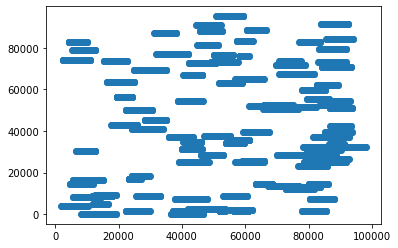

In [31]:
plt.scatter(easting,northing)

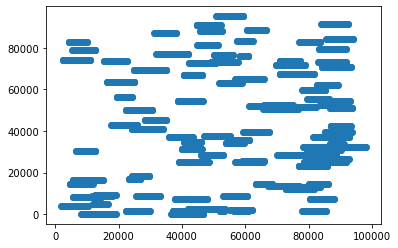

In [32]:
# these are the values that have been removed from the set of possible easting-northing pairs and as you can see,
# they match the locations of the wells
plt.scatter(eastOccupied,northOccupied)

# the predictions will still look like they have been applied to the entire map but no worries, these values have
# already been removed from the data set

In [33]:
# xPredict is set of easting, northing pairs for treeReg to predict on
xPredict = np.array([np.array([eastPredict]).flatten(),np.array([northPredict]).flatten()])
xPredict = xPredict.transpose()

# pulls the easting-northing values for the existing wells.
existingLocations = np.array([np.array([easting]).flatten(),np.array([northing]).flatten()]) # indep var = coordinates
existingLocations = existingLocations.transpose()

# do these constructions once for efficiency because they will be reused many times

In [34]:
# function that runs a regression for a given list of values on the rest of the easting-northing plane
# returns a list of predicted values for each easting-northing pair in xPredict (2-d array)
    
def predictor(predict):
    tree = DecisionTreeRegressor()
    
    # dependent variable is the metric that was passed in
    y = np.array([predict]).flatten()
    y = y.reshape(-1,1)
    
    tree.fit(existingLocations,y)
    
    # predict the thing
    Predict = tree.predict(xPredict)
    #plt.scatter(eastPredict,northPredict, c = Predict, cmap = "Reds")
    return Predict

porosityPred = predictor(porosity)

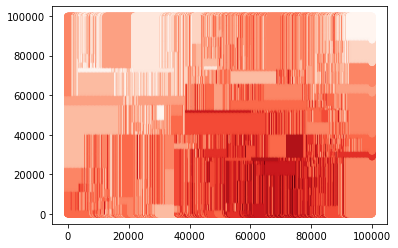

In [35]:
plt.scatter(eastPredict,northPredict, c = porosityPred, cmap = "Reds")

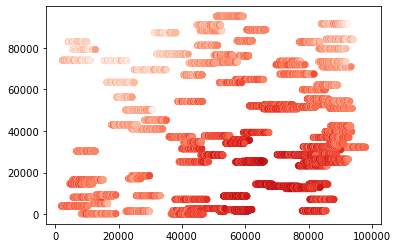

In [36]:
plt.scatter(easting,northing, c = porosity, cmap = "Reds")

In [37]:
permPredict = predictor(permeability)

In [38]:
poissPredict = predictor(poissonRatio)

In [39]:
ymPredict = predictor(youngMod)

In [40]:
wsPredict = predictor(waterSat)

In [41]:
osPredict = predictor(oilSat)

In [42]:
thicknessPredict = predictor(thickness)

In [43]:
propwtPredict = predictor(proppWt)

In [44]:
pumprtPredict = predictor(pumpRt)

In [45]:
pumprtPredict

array([269.40201449, 269.40201449, 298.73434495, ..., 302.2810494 ,
       302.2810494 , 302.2810494 ])

In [48]:
predData = pd.DataFrame()
predData["Easting"] = eastPredict
predData["Northing"] = northPredict
predData["Porosity"] = porosityPred
predData['Permeability'] = permPredict
predData['Poisson Ratio'] = poissPredict
predData['Youngs Modulus'] = ymPredict
predData['Water Saturation'] = wsPredict
predData['Oil Saturation'] = osPredict
predData['Thickness'] = thicknessPredict
predData['Proppant Weight'] = propwtPredict
predData['Pump Rate'] = pumprtPredict

In [49]:
predData

,easting,northing,porosity,permeability,poisson ration,youngs modulus,water saturation,oil saturation,thickness,proppant weight,pump rate
0,0,0,0.06,0.014,0.367,3738904.716,0.233014,0.766986,5.000000,6.215235e+05,269.402014
1,0,100,0.06,0.014,0.367,3738904.716,0.233014,0.766986,5.000000,6.215235e+05,269.402014
2,0,200,0.06,0.014,0.367,3738904.716,0.233014,0.766986,5.000000,1.049476e+06,298.734345
3,0,300,0.06,0.014,0.367,3738904.716,0.233014,0.766986,5.000000,1.049476e+06,298.734345
4,0,400,0.06,0.014,0.367,3738904.716,0.233014,0.766986,5.000000,1.049476e+06,298.734345
...,...,...,...,...,...,...,...,...,...,...,...
992235,99900,99500,0.00,0.000,0.278,6802148.832,0.088785,0.911215,53.155408,7.867529e+05,302.281049
992236,99900,99600,0.00,0.000,0.278,6802148.832,0.088785,0.911215,53.155408,7.867529e+05,302.281049
992237,99900,99700,0.00,0.000,0.278,6802148.832,0.088785,0.911215,53.155408,7.867529e+05,302.281049
992238,99900,99800,0.00,0.000,0.278,6802148.832,0.088785,0.911215,53.155408,7.867529e+05,302.281049
